In [1]:
import systems, rgf
import kwant
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math, cmath

c:\Users\saumi\anaconda3\envs\kw\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [31]:
for _ in range(10):
    a = np.arange(16)
    np.random.shuffle(a)
pd.Series(a//4 + 1).to_csv('t.csv')

In [15]:
lead = systems.zigzag_lead({})

r = rgf.rgf(lead)

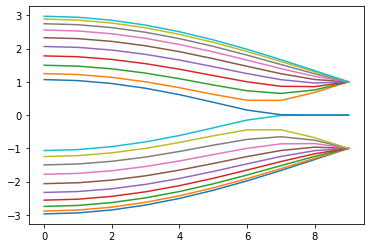

In [3]:
momenta = np.linspace(0, math.pi, 10)

plt.plot(r.bands(momenta=momenta));


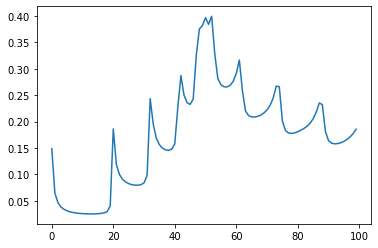

In [7]:
plt.plot(r.density({'lengths':[100], 'energies':np.linspace(1e-2, 2, 100), 'gamma_ratio':100})[0])

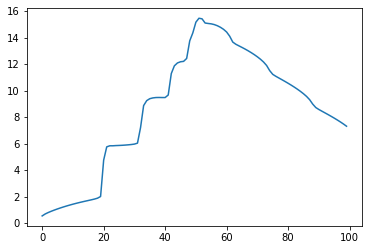

In [8]:
plt.plot(r.conductivity({'lengths':[100], 'energies':np.linspace(1e-2, 2, 100), 'gamma_ratio':100})[0])

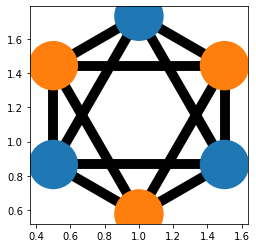

In [4]:
kwant.plot(systems.kane_mele({'L':2, 'W':2, 't2':0, 't3':0, 'leads':False}));

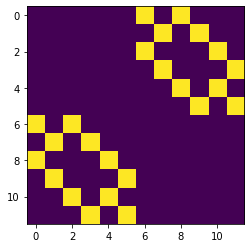

In [15]:
plt.imshow(abs(systems.kane_mele({'W':2, 'L':2, 'V':0, 'dis':1, 't2':0, 't3':0, 'leads':False}).hamiltonian_submatrix()))

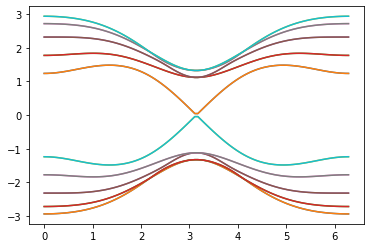

In [3]:
sys = systems.kane_mele({'L':10, 'W':5, 't1':1, 't2':0.5, 'leads':True})
lead = sys.leads[0]

momenta = np.linspace(0, 2*math.pi, 100)
energies = []

ham = lead.cell_hamiltonian()
hop = np.empty(ham.shape, dtype=complex)
t = lead.inter_cell_hopping()
hop[:, : t.shape[1]] = t
hop[:, t.shape[1] : ] = 0
    
energies = []
eigenfunctions = []


for k in momenta:
    V = hop*cmath.exp(-1j*k)
    H = ham + V + V.transpose().conjugate()
    ev, ef = np.linalg.eigh(H)
    energies.append(ev)
    eigenfunctions.append(ef)

plt.plot(momenta, energies);

In [ ]:
np.